In [2]:
import pandas as pd
df = pd.read_csv('update3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Data columns (total 12 columns):
ticker         5224 non-null object
name           5224 non-null object
website        5223 non-null object
sector         5216 non-null object
industry       5216 non-null object
description    5224 non-null object
key_words      5224 non-null object
facebook       2451 non-null object
twitter        2766 non-null object
linkedin       2775 non-null object
youtube        1756 non-null object
instagram      1137 non-null object
dtypes: object(12)
memory usage: 489.8+ KB


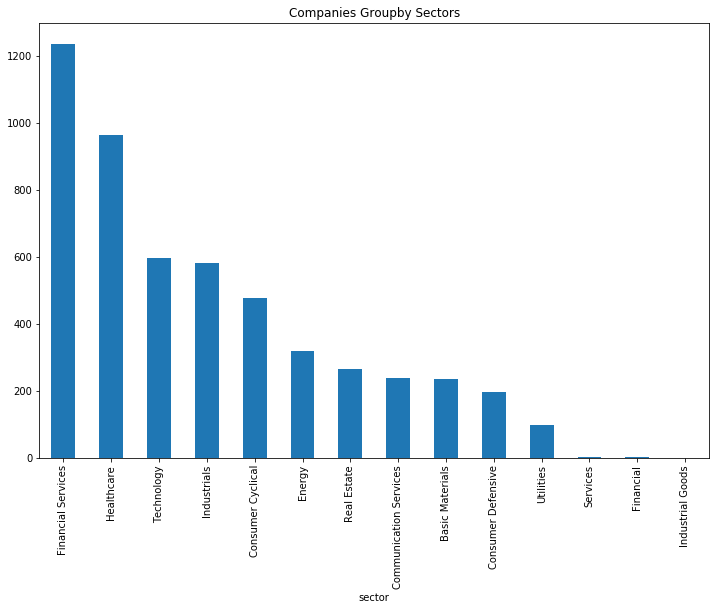

In [22]:
group_by_sector = df.groupby(['sector']).size().to_frame()
group_by_sector.rename(columns = {0:'amount'},inplace = True)

import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
group_by_sector['amount'].sort_values(ascending=False).plot(kind = 'bar', title = 'Companies Groupby Sectors')


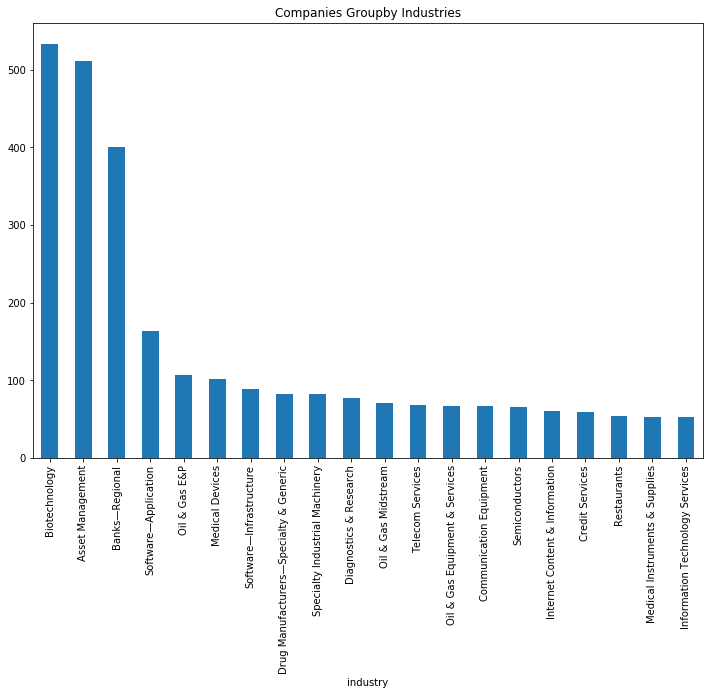

In [23]:
#select top 20 industries
group_by_ind = df.groupby(['industry']).size().to_frame()
group_by_ind.rename(columns = {0:'amount'},inplace = True)

import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
group_by_ind['amount'].sort_values(ascending=False)[0:20].plot(kind = 'bar', title = 'Companies Groupby Industries')


In [49]:
#top 10 frequent key words group by sectors
total_dict = {}
for n in df.index:
    key_words = list(df['key_words'][n].split(', '))
    sector = df['sector'][n]
    if not sector in total_dict.keys():
        total_dict[sector] = key_words
    else:
        total_dict[sector] += key_words

final_dict = {}
for i in total_dict.keys():
    list_ = total_dict[i]
    temp = {n: list_.count(n) for n in set(list_)}
    temp1 = sorted(temp.items(),key = lambda x: x[1], reverse  = True)[0:10]
    final_dict[i] = temp1

temp_dict = {}
for i in final_dict.keys():
    top_10 = final_dict[i]
    temp = list()
    for n in top_10:
        temp.append(n[0])
    temp = ', '.join(str(j) for j in temp)
    temp_dict[i] = temp

df_words = pd.DataFrame.from_dict(temp_dict, orient='index')
df_words.to_csv('top10 words by sectors.csv')

In [50]:
df_words

,0
Healthcare,"treatment, clinical, phase, trial, product, pa..."
Basic Materials,"specialty, located, industrial, operates, mini..."
Consumer Defensive,"food, operates, care, including, home, retail,..."
Industrials,"industrial, operates, commercial, solutions, p..."
Financial Services,"fund, invests, commercial, fixed, income, bank..."
Technology,"solutions, software, data, management, platfor..."
Consumer Cyclical,"operates, retail, stores, including, founded, ..."
Real Estate,"real, estate, properties, investment, portfoli..."
NaN,"operates, management, treatment, fund, liquefi..."
Energy,"oil, gas, natural, operates, crude, production..."
